In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_excel(r'Assignment file for Data Analyst.xlsx')

In [4]:
df = pd.DataFrame(df)
df.head()


,Timestamp,Current,Total voltage,SOC,Temperature,SOH,Equivalent cycle,Application status,Grid status,Grid power,Grid energy consumption,Grid cumulative energy consumption
0,1556701215000,0,66.72,1.0,25.229167,1.000000,0.0,1,1,0.0,0.0,0.0
1,1556702215000,0,66.72,1.0,25.528210,0.999774,0.0,1,1,0.0,0.0,0.0
2,1556703215000,0,66.72,1.0,25.859735,0.999679,0.0,1,1,0.0,0.0,0.0
3,1556704215000,0,66.72,1.0,26.204830,0.999606,0.0,1,1,0.0,0.0,0.0
4,1556705215000,0,66.72,1.0,26.553448,0.999542,0.0,1,1,0.0,0.0,0.0


In [6]:
import time;
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')
#df = df.drop(['date'] , axis = 1)
df.head()

,Timestamp,Current,Total voltage,SOC,Temperature,SOH,Equivalent cycle,Application status,Grid status,Grid power,Grid energy consumption,Grid cumulative energy consumption
0,2019-05-01 09:00:15,0,66.72,1.0,25.229167,1.000000,0.0,1,1,0.0,0.0,0.0
1,2019-05-01 09:16:55,0,66.72,1.0,25.528210,0.999774,0.0,1,1,0.0,0.0,0.0
2,2019-05-01 09:33:35,0,66.72,1.0,25.859735,0.999679,0.0,1,1,0.0,0.0,0.0
3,2019-05-01 09:50:15,0,66.72,1.0,26.204830,0.999606,0.0,1,1,0.0,0.0,0.0
4,2019-05-01 10:06:55,0,66.72,1.0,26.553448,0.999542,0.0,1,1,0.0,0.0,0.0


In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.dtypes

Timestamp                             datetime64[ns]
Current                                        int64
Total voltage                                float64
SOC                                          float64
Temperature                                  float64
SOH                                          float64
Equivalent cycle                             float64
Application status                             int64
Grid status                                    int64
Grid power                                   float64
Grid energy consumption                      float64
Grid cumulative energy consumption           float64
dtype: object

In [9]:
df.describe()

,Current,Total voltage,SOC,Temperature,SOH,Equivalent cycle,Application status,Grid status,Grid power,Grid energy consumption,Grid cumulative energy consumption
count,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,3.110400e+04
mean,-0.003858,64.272196,0.828945,27.915732,0.948226,52.563840,0.999968,0.988137,221.494578,61.526272,9.442240e+05
std,33.170852,1.918436,0.134033,13.308070,0.019635,31.301743,0.005670,0.108273,299.129090,83.091414,5.556151e+05
min,-300.000000,48.160346,-0.155714,20.263275,0.919398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,63.700213,0.781742,22.272948,0.932068,24.438458,1.000000,1.000000,0.000000,0.000000,4.466059e+05
50%,0.000000,65.299735,0.901914,26.060848,0.945187,52.499507,1.000000,1.000000,0.000000,0.000000,9.466569e+05
75%,10.000000,65.344541,0.905029,29.523420,0.963154,77.241660,1.000000,1.000000,617.410545,171.502929,1.386711e+06
max,10.000000,66.720000,1.000000,136.118156,1.000000,107.847718,1.000000,1.000000,654.014349,181.670653,1.913713e+06


Text(0, 0.5, 'SOC')

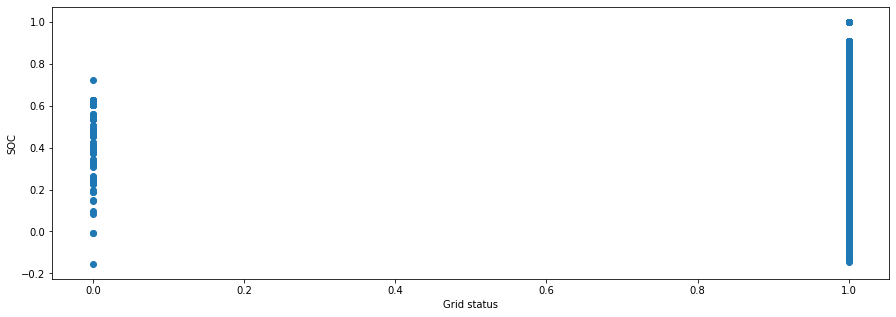

In [10]:
plt.figure(figsize = (15, 5)) 
plt.scatter(df['Grid status'],df['SOC'])
plt.xlabel("Grid status")
plt.ylabel("SOC")
#df['Grid status'].plot(kind = 'hist')
#plt.ylim(-10,2)

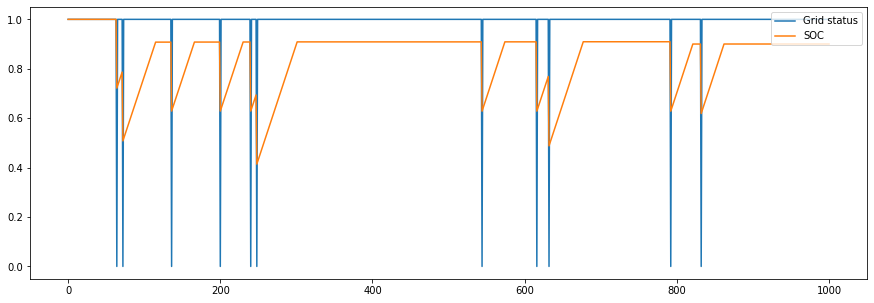

In [11]:
plt.figure(figsize = (15,5))
plt.plot(df['Grid status'].loc[:1000],label = "Grid status")
plt.plot(df['SOC'].loc[:1000], label = 'SOC')
plt.legend( loc= 'upper right')

In [12]:
from scipy.stats import pearsonr,spearmanr

In [13]:
pcorr,_ = pearsonr(df['Grid status'],df['SOC'])
scorr,_ = spearmanr(df['Grid status'],df['SOC'])
print(f"Pearson's coeff :{pcorr:.3f} \nSpearman's coeff :{scorr:.3f}")

Pearson's coeff :0.228 
Spearman's coeff :0.168


In [14]:
#pip install scipy

In [15]:
#pip install --upgrade scipy

Text(0, 0.5, 'SOH')

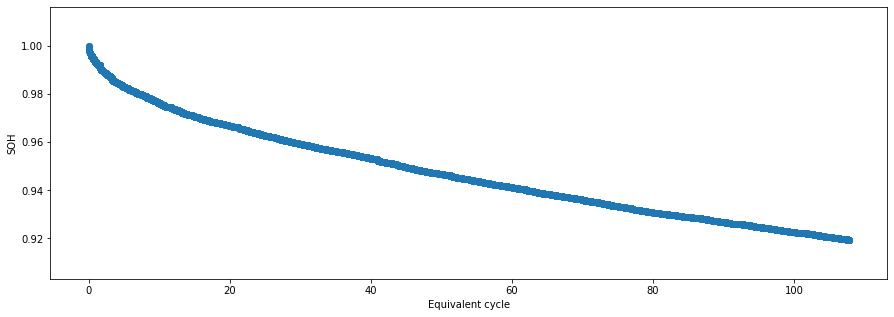

In [16]:
plt.figure(figsize = (15,5))
plt.scatter(df['Equivalent cycle'],df['SOH'])
plt.xlabel("Equivalent cycle")
plt.ylabel("SOH")

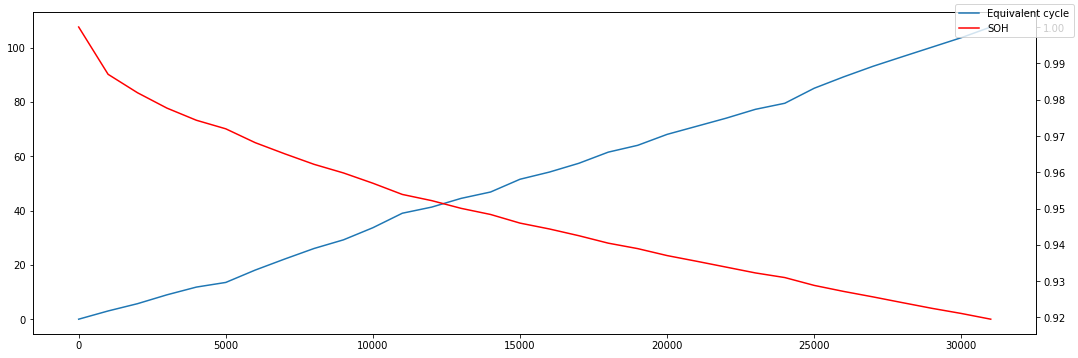

In [17]:
fig,ax1 = plt.subplots(figsize= (15,5))
ax1.plot(df['Equivalent cycle'].loc[::1000] ,label = "Equivalent cycle")
ax2 = ax1.twinx()
ax2.plot(df['SOH'].loc[::1000], label = 'SOH' , color = 'red')
fig.tight_layout()
fig.legend( loc= 'upper right')
plt.show()

In [18]:
apcorr,_ = pearsonr(df['Equivalent cycle'],df['SOH'])
ascorr,_ = spearmanr(df['Equivalent cycle'],df['SOH'])
print(f"Pearson's coeff :{apcorr:.3f} \nSpearman's coeff :{ascorr:.3f}")

Pearson's coeff :-0.984 
Spearman's coeff :-1.000


Text(0, 0.5, 'Temperature')

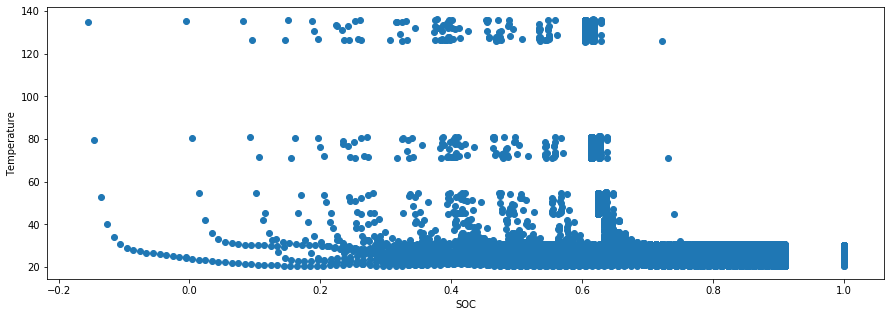

In [19]:
plt.figure(figsize = (15,5))
plt.scatter(df['SOC'],df['Temperature'])
plt.xlabel("SOC")
plt.ylabel("Temperature")

In [20]:
bpcorr,_ = pearsonr(df['Temperature'],df['SOC'])
bscorr,_ = spearmanr(df['Temperature'],df['SOC'])
print(f"Pearson's coeff :{bpcorr:.3f} \nSpearman's coeff :{bscorr:.3f}")

Pearson's coeff :-0.369 
Spearman's coeff :-0.207


In [21]:
df.corr()

,Current,Total voltage,SOC,Temperature,SOH,Equivalent cycle,Application status,Grid status,Grid power,Grid energy consumption,Grid cumulative energy consumption
Current,1.000000e+00,0.078020,0.120857,-0.818921,-0.000564,0.000640,-6.594991e-07,0.988289,0.223321,0.223321,0.000884
Total voltage,7.802047e-02,1.000000,0.996240,-0.326546,0.054130,-0.053510,4.762158e-02,0.184622,-0.666429,-0.666429,-0.051234
SOC,1.208567e-01,0.996240,1.000000,-0.369040,0.054005,-0.053320,3.531014e-02,0.227947,-0.668910,-0.668910,-0.051038
Temperature,-8.189212e-01,-0.326546,-0.369040,1.000000,0.003684,-0.004896,1.668334e-03,-0.845026,0.054698,0.054698,-0.005666
SOH,-5.643790e-04,0.054130,0.054005,0.003684,1.000000,-0.984262,6.455398e-03,0.003190,-0.021221,-0.021221,-0.985855
Equivalent cycle,6.402455e-04,-0.053510,-0.053320,-0.004896,-0.984262,1.000000,-7.205035e-03,-0.002752,0.018367,0.018367,0.999942
Application status,-6.594991e-07,0.047622,0.035310,0.001668,0.006455,-0.007205,1.000000e+00,0.051749,0.004199,0.004199,-0.007083
Grid status,9.882892e-01,0.184622,0.227947,-0.845026,0.003190,-0.002752,5.174904e-02,1.000000,0.081135,0.081135,-0.002278
Grid power,2.233209e-01,-0.666429,-0.668910,0.054698,-0.021221,0.018367,4.198656e-03,0.081135,1.000000,1.000000,0.016952
Grid energy consumption,2.233209e-01,-0.666429,-0.668910,0.054698,-0.021221,0.018367,4.198656e-03,0.081135,1.000000,1.000000,0.016952
